In [61]:
import torch
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("USING device :",device)
print(torch.cuda.get_device_name(0))    

USING device : cuda
NVIDIA RTX A2000


In [62]:
cd

/home/parul


/home/parul/anaconda3/envs/maitreya/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/parul/anaconda3/envs/maitreya/lib/python3.12/site-packages/IPython/core/magics/osm.py:428: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [63]:
import os

training_data = r"/home/parul/Downloads/archive/seg_train/seg_train"
testing_data = r"/home/parul/Downloads/archive/seg_test/seg_test"

class_paths = []

for item in os.listdir(training_data):
    item_path = os.path.join(training_data, item)
    if os.path.isdir(item_path):
        class_paths.append(item_path)

print("Classes found:", class_paths)

Classes found: ['/home/parul/Downloads/archive/seg_train/seg_train/buildings', '/home/parul/Downloads/archive/seg_train/seg_train/forest', '/home/parul/Downloads/archive/seg_train/seg_train/street', '/home/parul/Downloads/archive/seg_train/seg_train/sea', '/home/parul/Downloads/archive/seg_train/seg_train/mountain', '/home/parul/Downloads/archive/seg_train/seg_train/glacier']


In [64]:
class_paths

['/home/parul/Downloads/archive/seg_train/seg_train/buildings',
 '/home/parul/Downloads/archive/seg_train/seg_train/forest',
 '/home/parul/Downloads/archive/seg_train/seg_train/street',
 '/home/parul/Downloads/archive/seg_train/seg_train/sea',
 '/home/parul/Downloads/archive/seg_train/seg_train/mountain',
 '/home/parul/Downloads/archive/seg_train/seg_train/glacier']

In [65]:
images=[]
labels=[]


# 2. For each class folder, gather image file paths
for class_path in class_paths:
    # Loop over each file in the class folder
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        # Check if it's a file (not a subdirectory)
        if os.path.isfile(file_path):
            images.append(file_path)

In [66]:
images[:5]

['/home/parul/Downloads/archive/seg_train/seg_train/buildings/4178.jpg',
 '/home/parul/Downloads/archive/seg_train/seg_train/buildings/13400.jpg',
 '/home/parul/Downloads/archive/seg_train/seg_train/buildings/11410.jpg',
 '/home/parul/Downloads/archive/seg_train/seg_train/buildings/13247.jpg',
 '/home/parul/Downloads/archive/seg_train/seg_train/buildings/20017.jpg']

In [67]:
for image_path in images:
    # os.path.dirname(image_path) gives the directory path (e.g., ".../seg_train/forest")
    # os.path.basename(...) then gives the last part of that path (e.g., "forest")
    class_name = os.path.basename(os.path.dirname(image_path))
    labels.append(class_name)

print( images[:5])
print(labels[:5])

['/home/parul/Downloads/archive/seg_train/seg_train/buildings/4178.jpg', '/home/parul/Downloads/archive/seg_train/seg_train/buildings/13400.jpg', '/home/parul/Downloads/archive/seg_train/seg_train/buildings/11410.jpg', '/home/parul/Downloads/archive/seg_train/seg_train/buildings/13247.jpg', '/home/parul/Downloads/archive/seg_train/seg_train/buildings/20017.jpg']
['buildings', 'buildings', 'buildings', 'buildings', 'buildings']


In [68]:
training_array=[]
training_array.append(images)
training_array.append(labels)

In [69]:

import cv2

img_array=[] 
for img_path in images:
    img = cv2.imread(img_path)
    
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img_array.append(img)

In [70]:
img

array([[[0.85490196, 0.84313725, 0.82745098],
        [0.85490196, 0.84313725, 0.82745098],
        [0.85490196, 0.84313725, 0.82745098],
        ...,
        [0.85882353, 0.83921569, 0.82745098],
        [0.85490196, 0.83529412, 0.82352941],
        [0.85490196, 0.83529412, 0.82352941]],

       [[0.84313725, 0.83137255, 0.81568627],
        [0.84313725, 0.83137255, 0.81568627],
        [0.84313725, 0.83137255, 0.81568627],
        ...,
        [0.8627451 , 0.84313725, 0.83137255],
        [0.85882353, 0.83921569, 0.82745098],
        [0.85490196, 0.83529412, 0.82352941]],

       [[0.83137255, 0.81960784, 0.80392157],
        [0.83137255, 0.81960784, 0.80392157],
        [0.83137255, 0.81960784, 0.80392157],
        ...,
        [0.86666667, 0.84705882, 0.83529412],
        [0.8627451 , 0.83921569, 0.82745098],
        [0.85882353, 0.83921569, 0.82745098]],

       ...,

       [[0.51764706, 0.50588235, 0.45098039],
        [0.56470588, 0.55294118, 0.49803922],
        [0.5372549 , 0

In [71]:
labels[:5]

['buildings', 'buildings', 'buildings', 'buildings', 'buildings']

In [72]:
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()

# Fit the encoder on your labels and transform them to numeric values
encoded_labels = label_encoder.fit_transform(labels)

# Display the encoded labels
print("Encoded Labels:", encoded_labels)

# Display the mapping from class names to integers
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", mapping)

Encoded Labels: [0 0 0 ... 2 2 2]
Label Mapping: {np.str_('buildings'): 0, np.str_('forest'): 1, np.str_('glacier'): 2, np.str_('mountain'): 3, np.str_('sea'): 4, np.str_('street'): 5}


In [73]:
import numpy as np
np.unique(labels)

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype='<U9')

In [74]:
# import torch.nn.functional as F
# encoded_labels_tensor = torch.tensor(encoded_labels)

# one_hot_labels= F.one_hot(encoded_labels_tensor,num_classes=6)

# print("Integer Labels:", encoded_labels)
# print("One-Hot Encoded Labels:\n", one_hot_labels)

In [75]:
# print(images[-1],one_hot_labels[-1])

In [76]:
import matplotlib.pyplot as plt

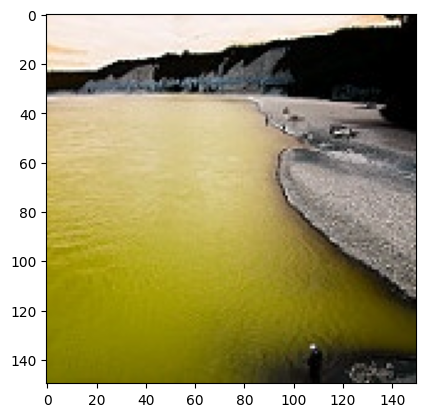

In [77]:
img=cv2.imread(images[-2])
plt.imshow(img)



In [78]:
images_np = np.array(img_array)
encoded_labels_np = np.array(encoded_labels)

# Create a random permutation of indices
indices = np.random.permutation(len(images_np))

# Use the indices to shuffle both arrays
shuffled_images = images_np[indices]
shuffled_labels = encoded_labels[indices]

In [79]:
training_images=shuffled_images
labels=shuffled_labels



In [80]:
training_images[0],encoded_labels[0]

(array([[[0.96078431, 0.92156863, 0.92156863],
         [0.98039216, 0.9372549 , 0.9372549 ],
         [0.99607843, 0.94901961, 0.94901961],
         ...,
         [1.        , 0.87843137, 0.78431373],
         [0.99607843, 0.8627451 , 0.78039216],
         [1.        , 0.8745098 , 0.79607843]],
 
        [[0.98039216, 0.94117647, 0.94117647],
         [0.99215686, 0.94901961, 0.94901961],
         [0.99607843, 0.94901961, 0.94901961],
         ...,
         [0.99607843, 0.84705882, 0.74509804],
         [0.99215686, 0.83921569, 0.74117647],
         [1.        , 0.85490196, 0.76470588]],
 
        [[0.99215686, 0.94509804, 0.94509804],
         [0.99215686, 0.94117647, 0.94117647],
         [0.98823529, 0.9372549 , 0.92941176],
         ...,
         [0.98431373, 0.81176471, 0.69411765],
         [0.98039216, 0.80392157, 0.69411765],
         [0.99607843, 0.82745098, 0.71764706]],
 
        ...,
 
        [[0.21960784, 0.25098039, 0.25098039],
         [0.34509804, 0.37647059, 0.37254

In [81]:
training_images[0]

array([[[0.96078431, 0.92156863, 0.92156863],
        [0.98039216, 0.9372549 , 0.9372549 ],
        [0.99607843, 0.94901961, 0.94901961],
        ...,
        [1.        , 0.87843137, 0.78431373],
        [0.99607843, 0.8627451 , 0.78039216],
        [1.        , 0.8745098 , 0.79607843]],

       [[0.98039216, 0.94117647, 0.94117647],
        [0.99215686, 0.94901961, 0.94901961],
        [0.99607843, 0.94901961, 0.94901961],
        ...,
        [0.99607843, 0.84705882, 0.74509804],
        [0.99215686, 0.83921569, 0.74117647],
        [1.        , 0.85490196, 0.76470588]],

       [[0.99215686, 0.94509804, 0.94509804],
        [0.99215686, 0.94117647, 0.94117647],
        [0.98823529, 0.9372549 , 0.92941176],
        ...,
        [0.98431373, 0.81176471, 0.69411765],
        [0.98039216, 0.80392157, 0.69411765],
        [0.99607843, 0.82745098, 0.71764706]],

       ...,

       [[0.21960784, 0.25098039, 0.25098039],
        [0.34509804, 0.37647059, 0.37254902],
        [0.37254902, 0

In [82]:

labels_training=labels

In [83]:
import os

training_data = r"/home/parul/Downloads/archive/seg_train/seg_train"
testing_data = r"/home/parul/Downloads/archive/seg_test/seg_test"

class_paths = []

for item in os.listdir(testing_data):
    item_path = os.path.join(testing_data, item)
    if os.path.isdir(item_path):
        class_paths.append(item_path)

print("Classes found:", class_paths)

Classes found: ['/home/parul/Downloads/archive/seg_test/seg_test/buildings', '/home/parul/Downloads/archive/seg_test/seg_test/forest', '/home/parul/Downloads/archive/seg_test/seg_test/street', '/home/parul/Downloads/archive/seg_test/seg_test/sea', '/home/parul/Downloads/archive/seg_test/seg_test/mountain', '/home/parul/Downloads/archive/seg_test/seg_test/glacier']


In [84]:
images=[]
labels=[]


# 2. For each class folder, gather image file paths
for class_path in class_paths:
    # Loop over each file in the class folder
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        # Check if it's a file (not a subdirectory)
        if os.path.isfile(file_path):
            images.append(file_path)

In [85]:
images[:5]

['/home/parul/Downloads/archive/seg_test/seg_test/buildings/20186.jpg',
 '/home/parul/Downloads/archive/seg_test/seg_test/buildings/21631.jpg',
 '/home/parul/Downloads/archive/seg_test/seg_test/buildings/20553.jpg',
 '/home/parul/Downloads/archive/seg_test/seg_test/buildings/22665.jpg',
 '/home/parul/Downloads/archive/seg_test/seg_test/buildings/23297.jpg']

In [86]:
for image_path in images:
    # os.path.dirname(image_path) gives the directory path (e.g., ".../seg_train/forest")
    # os.path.basename(...) then gives the last part of that path (e.g., "forest")
    class_name = os.path.basename(os.path.dirname(image_path))
    labels.append(class_name)

print( images[:5])
print(labels[:5])

['/home/parul/Downloads/archive/seg_test/seg_test/buildings/20186.jpg', '/home/parul/Downloads/archive/seg_test/seg_test/buildings/21631.jpg', '/home/parul/Downloads/archive/seg_test/seg_test/buildings/20553.jpg', '/home/parul/Downloads/archive/seg_test/seg_test/buildings/22665.jpg', '/home/parul/Downloads/archive/seg_test/seg_test/buildings/23297.jpg']
['buildings', 'buildings', 'buildings', 'buildings', 'buildings']


In [87]:
import cv2

img_array=[] 
for img_path in images:
    img = cv2.imread(img_path)
    
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img_array.append(img)

In [88]:
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()

# Fit the encoder on your labels and transform them to numeric values
encoded_labels = label_encoder.fit_transform(labels)

# Display the encoded labels
print("Encoded Labels:", encoded_labels)

# Display the mapping from class names to integers
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", mapping)

Encoded Labels: [0 0 0 ... 2 2 2]
Label Mapping: {np.str_('buildings'): 0, np.str_('forest'): 1, np.str_('glacier'): 2, np.str_('mountain'): 3, np.str_('sea'): 4, np.str_('street'): 5}


In [89]:
# import torch.nn.functional as F
# encoded_labels_tensor = torch.tensor(encoded_labels)

# one_hot_labels= F.one_hot(encoded_labels_tensor,num_classes=6)

# print("Integer Labels:", encoded_labels)
# print("One-Hot Encoded Labels:\n", one_hot_labels)

In [90]:
print(images[-1],encoded_labels[-1])

/home/parul/Downloads/archive/seg_test/seg_test/glacier/24334.jpg 2


In [91]:
images_np = np.array(img_array)
encoded_labels_np = np.array(encoded_labels)

# Create a random permutation of indices
indices = np.random.permutation(len(images_np))

# Use the indices to shuffle both arrays
shuffled_images = images_np[indices]
shuffled_encoded_labels = encoded_labels_np[indices]

In [92]:
testing_images=shuffled_images
encoded_labels=shuffled_encoded_labels


In [93]:
labels_testing=encoded_labels

In [94]:
len(training_images)

14034

In [95]:
len(testing_images)

3000

In [96]:
len(labels_training)

14034

In [97]:
training_images[0].shape
    

(128, 128, 3)

In [98]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset

# # --- Data Preparation ---
# # Assume training_images is a NumPy array of shape (N, 128, 128, 3)
# # and training_labels is a NumPy array of shape (N,) with integer labels [0, 5].
# # The images are already normalized (values in the range [0, 1]).

# # Convert images to a PyTorch tensor and permute dimensions from (N, 128, 128, 3) to (N, 3, 128, 128)
# training_images_tensor = torch.tensor(training_images, dtype=torch.float32).permute(0, 3, 1, 2)

# # Convert labels to a tensor (using long type for CrossEntropyLoss)
# training_labels_tens# Compute and visualize the confusion matrix.or = torch.tensor(labels_training, dtype=torch.long)

# # Create a TensorDataset and DataLoader for mini-batch processing
# train_dataset = TensorDataset(training_images_tensor, training_labels_tensor)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [99]:
# # --- Model Definition ---
# # For images of shape (128,128,3), the flattened size is: 3 * 128 * 128 = 49152.
# class SimpleANN(nn.Module):
#     def __init__(self, input_size=49152, hidden_size=128, num_classes=6):
#         super(SimpleANN, self).__init__()
#         # First fully connected layer
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         # ReLU activation function
#         self.relu = nn.ReLU()
#         # Output layer: produces logits for each class
#         self.fc2 = nn.Linear(hidden_size, num_classes)

        
    
#     def forward(self, x):
#         # Flatten the input tensor: from (batch_size, 3, 128, 128) to (batch_size, 49152)
#         x = x.view(x.size(0), -1)
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         # Return raw logits; CrossEntropyLoss applies softmax internally
#         return x

In [100]:
# # Instantiate the model
# model = Simple# Compute and visualize the confusion matrix.ANN()

# # --- Loss Function and Optimizer ---
# criterion = nn.CrossEntropyLoss()  # Standard loss for multi-class classification with integer labels
# optimizer = optim.Adam(model.parameters(), lr=0.001)


In [101]:
# # --- Training Loop ---
# num_epochs = 20
# for epoch in range(num_epochs):
#     model.train()  # Set model to training mode
#     running_loss = 0.0
    
#     for images, labels in train_loader:
#         optimizer.zero_grad()          # Clear the gradients for this batch
#         outputs = model(images)          # Forward pass: get model predictions
#         loss = criterion(outputs, labels)  # Compute the loss
#         loss.backward()                  # Backward pass: compute gradients
#         optimizer.step()                 # Update model parameters
        
        
#         running_loss += loss.item() * images.size(0)
    
#     epoch_loss = running_loss / len(train_dataset)
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

In [102]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# ------------- Data Preparation -------------
# Assume your data iIn most CNN-based classification tasks, the final layer usually consists of a softmax activation function, which outputs a probability distribution across the classes. For example, if you have 3 classes, the output will be a vector like [0.1, 0.7, 0.2], where each value represents the probability of the sample belonging to that class. One-hot encoding allows the network to output a vector that can easily be compared with the true class label.s loaded into these NumPy arrays:
# - training_images: shape (N_train, 128, 128, 3), already normalized (values in [0,1])
# - training_labels: shape (N_train,) with integer labels (0-5)
# - testing_images: shape (N_test, 128, 128, 3)
# - testing_labels: shape (N_test,) with integer labels (0-5)

# Convert training images to tensors and rearrange dimensions from (N, 128, 128, 3) to (N, 3, 128, 128)
train_images_tensor = torch.tensor(training_images, dtype=torch.float32).permute(0, 3, 1, 2)
train_labels_tensor = torch.tensor(labels_training, dtype=torch.long)

# Similarly for test images
test_images_tensor = torch.tensor(testing_images, dtype=torch.float32).permute(0, 3, 1, 2)
test_labels_tensor = torch.tensor(labels_testing, dtype=torch.long)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
test_dataset  = TensorDataset(test_images_tensor, test_labels_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [103]:
# Adjusted Model Example
class ImprovedANN(nn.Module):
    def __init__(self, input_size=49152, hidden_sizes=[1024, 512, 256], num_classes=6, dropout_prob=0.3):
        super(ImprovedANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.bn1 = nn.BatchNorm1d(hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.bn2 = nn.BatchNorm1d(hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.bn3 = nn.BatchNorm1d(hidden_sizes[2])
        self.fc4 = nn.Linear(hidden_sizes[2], num_classes)
        self.act = nn.LeakyReLU(0.01)  # Changed activation
        self.dropout = nn.Dropout(dropout_prob)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.act(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.act(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.act(x)
        x = self.dropout(x)
        x = self.fc4(x)
        return x



In [104]:
learning_rate = 0.0005
num_epochs = 20

model = ImprovedANN(input_size=49152, hidden_sizes=[512, 256, 128], num_classes=6, dropout_prob=0.5).to(device)

criterion = nn.CrossEntropyLoss()  # Expects raw logits and integer labels
# Using weight decay in the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)

In [106]:

# ------------- Training Loop -------------
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images=images.to(device)
        labels=labels.to(device)
        optimizer.zero_grad()       # Clear gradients
        outputs = model(images)       # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()               # Backward pass
        optimizer.step()              # Update weights
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epoch [1/20], Loss: 1.3790
Epoch [2/20], Loss: 1.2235
Epoch [3/20], Loss: 1.1631
Epoch [4/20], Loss: 1.1231
Epoch [5/20], Loss: 1.0941
Epoch [6/20], Loss: 1.0552
Epoch [7/20], Loss: 1.0262
Epoch [8/20], Loss: 1.0020
Epoch [9/20], Loss: 0.9791
Epoch [10/20], Loss: 0.9575
Epoch [11/20], Loss: 0.9250
Epoch [12/20], Loss: 0.9085
Epoch [13/20], Loss: 0.8840
Epoch [14/20], Loss: 0.8728
Epoch [15/20], Loss: 0.8544
Epoch [16/20], Loss: 0.8307
Epoch [17/20], Loss: 0.8224
Epoch [18/20], Loss: 0.8011
Epoch [19/20], Loss: 0.7948
Epoch [20/20], Loss: 0.7617


In [107]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix

# Set the model to evaluation mode
model.eval()

all_preds = []
all_true = []

# Use no_grad() so that we don't compute gradients during evaluation
with torch.no_grad():
    for images, labels in test_loader:
        # Move the data to the GPU (or the appropriate device)
        images = images.to(device)
        labels = labels.to(device)
        
        # Get the model outputs
        outputs = model(images)
        # Get the predicted class indices (argmax over the class dimension)
        _, preds = torch.max(outputs, 1)
        
        # Append predictions and labels (moved to CPU and converted to NumPy arrays)
        all_preds.append(preds.cpu().numpy())
        all_true.append(labels.cpu().numpy())

# Concatenate the list of NumPy arrays into single arrays for predictions and true labels
if all_preds and all_true:
    all_preds = np.concatenate(all_preds)
    all_true = np.concatenate(all_true)
else:
    raise ValueError("No predictions collected. Check your test_loader and data.")

# Calculate metrics
accuracy  = accuracy_score(all_true, all_preds)
precision = precision_score(all_true, all_preds, average='weighted')
recall    = recall_score(all_true, all_preds, average='weighted')
f1        = f1_score(all_true, all_preds, average='weighted')

# Print metrics and classification report
print("\nTest Accuracy: {:.4f}".format(accuracy))
print("Test Precision: {:.4f}".format(precision))
print("Test Recall: {:.4f}".format(recall))
print("Test F1 Score: {:.4f}".format(f1))
print("\nClassification Report:\n", classification_report(all_true, all_preds))


Test Accuracy: 0.6207
Test Precision: 0.6361
Test Recall: 0.6207
Test F1 Score: 0.6165

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50       437
           1       0.88      0.66      0.76       474
           2       0.59      0.72      0.65       553
           3       0.66      0.63      0.64       525
           4       0.63      0.38      0.48       510
           5       0.57      0.80      0.66       501

    accuracy                           0.62      3000
   macro avg       0.64      0.62      0.61      3000
weighted avg       0.64      0.62      0.62      3000



In [108]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [109]:
cd

/home/parul


/home/parul/anaconda3/envs/maitreya/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/parul/anaconda3/envs/maitreya/lib/python3.12/site-packages/IPython/core/magics/osm.py:428: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Random image path: Downloads/archive/seg_pred/seg_pred/11588.jpg
Predicted class: street


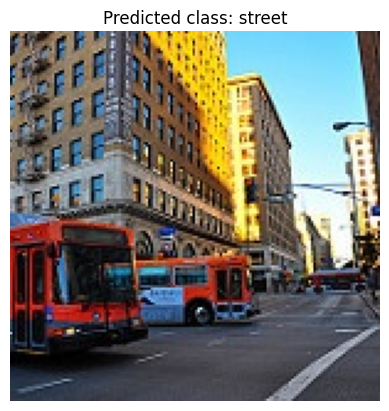

In [112]:
import os
import random
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# Path to your prediction folder
pred_folder = "Downloads/archive/seg_pred/seg_pred"

# List all image files in the folder (adjust the extensions as needed)
pred_files = [os.path.join(pred_folder, f) for f in os.listdir(pred_folder)
              if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Choose a random image from the folder
random_image_path = random.choice(pred_files)
print("Random image path:", random_image_path)

# Open the image and ensure it's in RGB format
img = Image.open(random_image_path).convert("RGB")

# Define the same transformation used in training
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to 128x128
    transforms.ToTensor(),          # Converts to tensor and scales pixel values to [0, 1]
    # If you applied any normalization during training, add it here.
    # Example: transforms.Normalize(mean=[...], std=[...])
])

# Apply transformation and add batch dimension
img_tensor = transform(img).unsqueeze(0)

# Move model and image tensor to the device (GPU if available)
model.to(device)
img_tensor = img_tensor.to(device)

# Evaluate the model on the image
model.eval()
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)

predicted_class = predicted.item()

# Define the class names in the same order as during training
class_names = ["buildings", "forest", "glacier", "mountain", "sea", "street"]
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)

# Optionally, display the image with the predicted class as the title
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.axis('off')
plt.show()

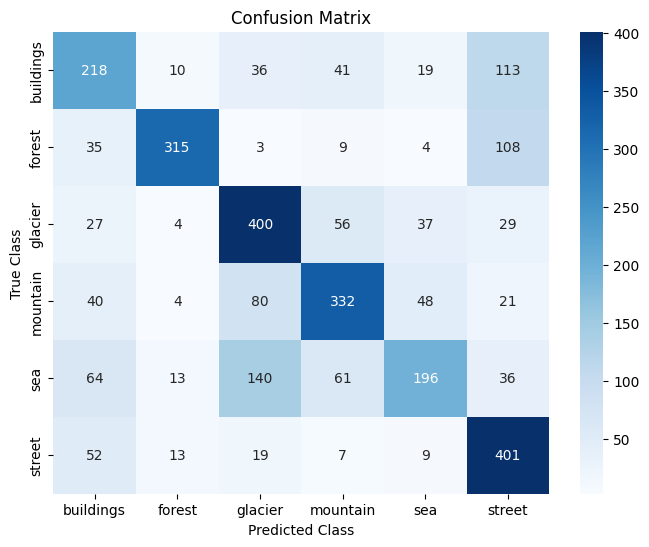

In [114]:
import seaborn as sns

cm = confusion_matrix(all_true, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()